#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


##1) Delivery_time -> Predict delivery time using sorting time

In [45]:
#To avoid  any warnings
import warnings
warnings.filterwarnings('ignore')

In [46]:
#Importing data set
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [47]:
import pandas as pd
dataset1 = pd.read_csv("delivery_time.csv")
dataset1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

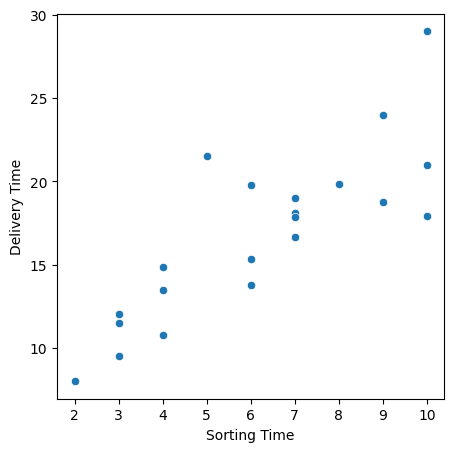

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(5,5))
sns.scatterplot(x ='Sorting Time',y = 'Delivery Time' , data = dataset1 , palette ='Set1')

From above scatter plot, increase in sorting time leads to increase delivery time

EDA


In [49]:
dataset1=dataset1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [50]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [51]:
dataset1.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [52]:
#Correlation

#-1 ------ -0.5 ------- 0 ------- +5 ------- +1

In [53]:
dataset1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


Correlation coefficient value r = 0.825997 indicates that there is a strong correlation between independent variable and dependent variable

In [54]:
import seaborn as sns


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

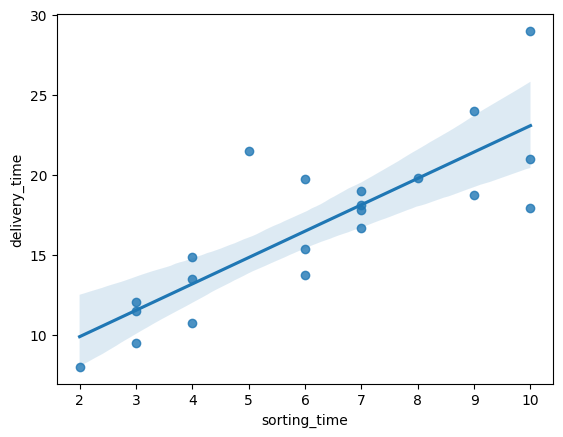

In [55]:
sns.regplot(x=dataset1['sorting_time'],y=dataset1['delivery_time'])

<Axes: xlabel='sorting_time', ylabel='Density'>

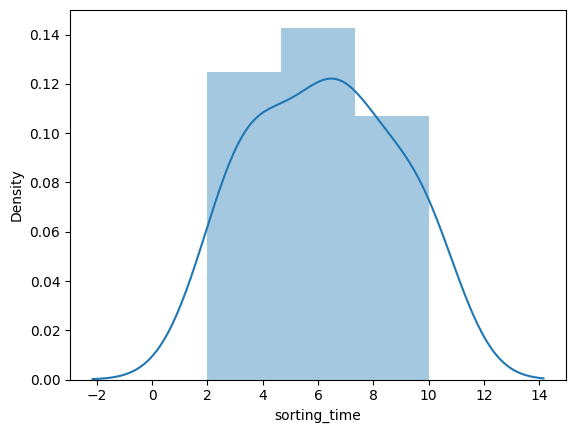

In [56]:
import seaborn as sns
sns.distplot(dataset1['sorting_time'])

<Axes: xlabel='delivery_time', ylabel='Density'>

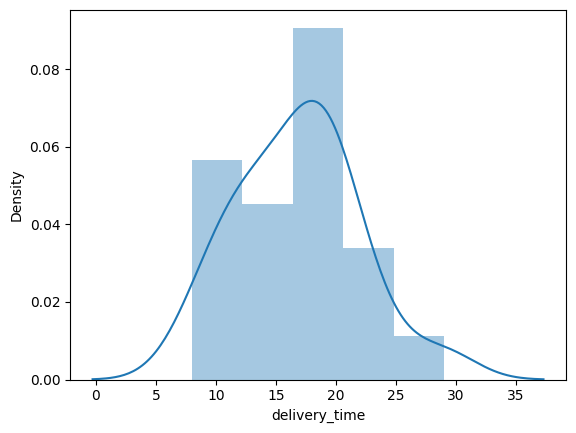

In [57]:
import seaborn as sns
sns.distplot(dataset1['delivery_time'])

In [58]:
#from the above dist plots we can say that there are no outliers

##Model Fitting

In [59]:
import statsmodels.formula.api as snf

In [60]:
model = snf.ols("delivery_time~sorting_time",data=dataset1).fit()
#Dependent Variable = Delivery Time and Independent variable is Sorting Time

##Model Testing

In [61]:
#Coefficients Parameters
model.params


Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [62]:
##beta value is 1.649020 and c = 6.582734  in y=B0+B1+x+e(y=c+mx)

In [63]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

Checking predictions of Model by equation

From the result Bo = 6.582734 and B1 = 1.649020, so our linear regression equation will become Y = Bo + B1X

Y = 6.582734 + 1.649020*X

y =B0 + B1 * X1 +e

B0 = Intercept

B1 = slope

X1 = independent data point

e(error) = Vertical distance between the actual 'delivery_time' value & the delivery_time fitted value

In [64]:
#manual calculation
##Y = 6.582734 + 1.649020*10
#Y

In [65]:
#To see the model predictions
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [66]:
dataset1['delivery_time_Predicted'] = model.fittedvalues
dataset1[0:5]

,delivery_time,sorting_time,delivery_time_Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


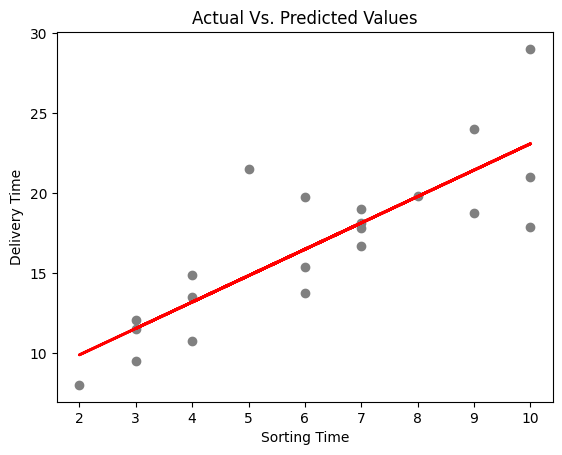

In [67]:
# Plotting Actual Vs. Predicted Values
plt.scatter(dataset1.sorting_time, dataset1.delivery_time,  color='gray')
plt.plot(dataset1.sorting_time, dataset1.delivery_time_Predicted, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [68]:
#for mannual calculations
#datset1['Predicted1'] = 6.582734  + (1.649020 * dataset1['sorting_time']	)
#dataset1[0:5]

In [69]:
#To generate the residual values
#Difference between Actual & Fitted values
dataset1['Error'] = model.resid   #redid = residuals
dataset1[0:5]


,delivery_time,sorting_time,delivery_time_Predicted,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067


In [70]:
#dataset1['Error1'] = dataset1['delivery_time'] - dataset1['delivery_time_Predicted']
#dataset1[0:5]

In [71]:
#Y = B0 +B1*X + e
#c = 6.582734
#m = 1.649020

dataset1['Y'] = 6.582734 + (1.649020 + dataset1['delivery_time'] + dataset1['Error'])
dataset1[0:5]

,delivery_time,sorting_time,delivery_time_Predicted,Error,Y
0,21.00,10,23.072933,-2.072933,27.158821
1,13.50,4,13.178814,0.321186,22.052940
2,19.75,6,16.476853,3.273147,31.254901
3,24.00,9,21.423913,2.576087,34.807841
4,29.00,10,23.072933,5.927067,43.158821


In [72]:
dataset1['Error_Sq'] = (dataset1['Error'])**2
dataset1[0:5]

,delivery_time,sorting_time,delivery_time_Predicted,Error,Y,Error_Sq
0,21.00,10,23.072933,-2.072933,27.158821,4.297051
1,13.50,4,13.178814,0.321186,22.052940,0.103161
2,19.75,6,16.476853,3.273147,31.254901,10.713489
3,24.00,9,21.423913,2.576087,34.807841,6.636224
4,29.00,10,23.072933,5.927067,43.158821,35.130124


In [73]:
Mean_Squared_Error = dataset1['Error_Sq'].mean()
Mean_Squared_Error

7.793311548584062

In [74]:
model.rsquared

0.6822714748417231

In [75]:
#68.2% of variation in the dependent variable is explained by the given independent varaible

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        12:01:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predict for new data Point

In [77]:

# Manual prediction for say sorting time 5
s= (6.582734) + (1.649020)*(5)
s

14.827834

In [78]:
newdata = pd.Series([5,19,21,11,31])
newdata
delrytime = pd.DataFrame( newdata, columns =['sorting_time'])
delrytime

,sorting_time
0,5
1,19
2,21
3,11
4,31


In [79]:
model.predict(delrytime)

0    14.827833
1    37.914112
2    41.212152
3    24.721953
4    57.702351
dtype: float64

In [80]:
delrytime['delivery_time_Predicted'] = model.predict(delrytime)
delrytime

,sorting_time,delivery_time_Predicted
0,5,14.827833
1,19,37.914112
2,21,41.212152
3,11,24.721953
4,31,57.702351


##2) Salary_hike -> Build a prediction model for Salary_hike


In [81]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [82]:
#Importing data set
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [84]:
import pandas as pd
dataset2 = pd.read_csv("Salary_Data.csv")
dataset2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


EDA

In [85]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Density'>

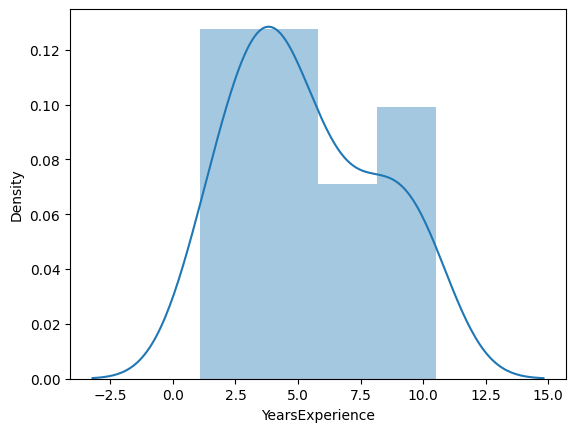

In [86]:
sns.distplot(dataset2['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

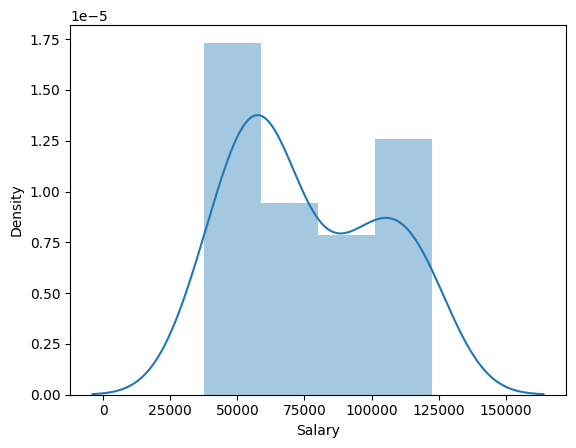

In [87]:
sns.distplot(dataset2['Salary'])

Correlation Analysis


In [88]:
dataset2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Visualization of Correlation beteen x and y
regplot = regression plot


<Axes: xlabel='YearsExperience', ylabel='Salary'>

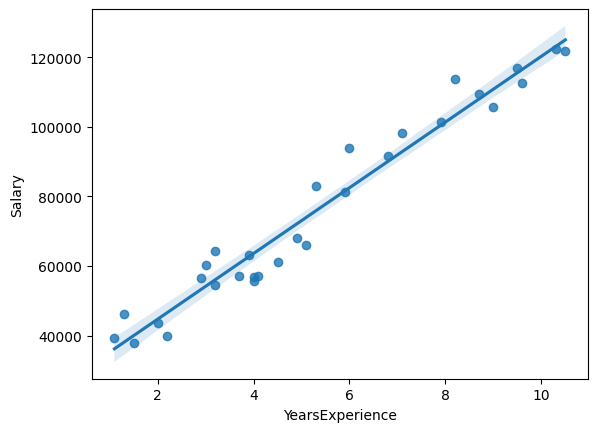

In [89]:
sns.regplot(x=dataset2['YearsExperience'],y=dataset2['Salary'])

###There is good correlation between the two variable.
###The score is more than 0.8 which is a good sign

Model Fitting

In [91]:

model1=smf.ols("Salary~YearsExperience",data=dataset2).fit()

Model Testing

In [93]:
model1.params

#coefficients Parameters

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [95]:
#Pvalues and tvalues
model1.tvalues, model1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [96]:
# Rsquared values
model1.rsquared , model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [97]:
#To see the model predictions
model1.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Checking predictions of Model by equation
From the result Bo = 25792.200198668703 and B1 = 9449.962321455077, so our linear regression equation will become Y = Bo + B1X
Y = 25792.200198668703 + 9449.962321455077*X

In [99]:
dataset2['salary_Predicted'] = model1.fittedvalues
dataset2[0:5]

,YearsExperience,Salary,salary_Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


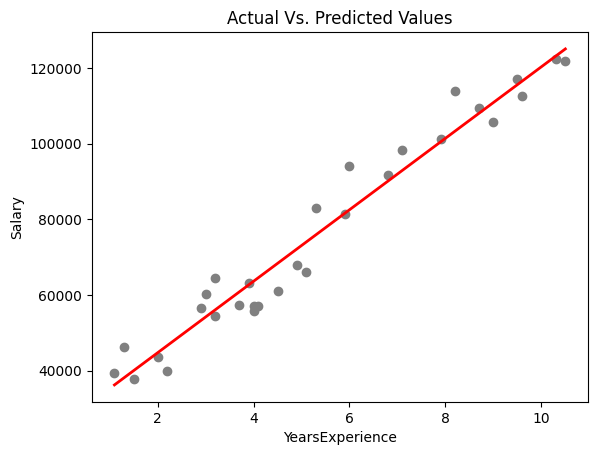

In [102]:
# Plotting Actual Vs. Predicted Values
plt.scatter(dataset2.YearsExperience, dataset2.Salary,  color='gray')
plt.plot(dataset2.YearsExperience, dataset2.salary_Predicted, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [103]:
#To generate the residual values
#Difference between Actual & Fitted values
dataset2['Error'] = model1.resid   #redid = residuals
dataset2[0:5]

,YearsExperience,Salary,salary_Predicted,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


In [107]:
dataset2['Y'] = 25792.200199 + (9449.962321 + dataset2['Salary'] + dataset2['Error'])
dataset2[0:5]

,YearsExperience,Salary,salary_Predicted,Error,Y
0,1.1,39343.0,36187.158752,3155.841248,77741.003768
1,1.3,46205.0,38077.151217,8127.848783,89575.011303
2,1.5,37731.0,39967.143681,-2236.143681,70737.018839
3,2.0,43525.0,44692.124842,-1167.124842,77600.037678
4,2.2,39891.0,46582.117306,-6691.117306,68442.045214


In [108]:
dataset2['Error_Sq'] = (dataset2['Error'])**2
dataset2[0:5]

,YearsExperience,Salary,salary_Predicted,Error,Y,Error_Sq
0,1.1,39343.0,36187.158752,3155.841248,77741.003768,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,89575.011303,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,70737.018839,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,77600.037678,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,68442.045214,4.477105e+07


In [109]:
Mean_Squared_Error2 = dataset2['Error_Sq'].mean()
Mean_Squared_Error2

31270951.72228097

In [110]:
model1.rsquared

0.9569566641435086

In [111]:
#95.69% of variation in the dependent variable is explained by the given independent varaible

In [112]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        14:49:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared scores are above 0.85.

(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

F-statitics is quite high as well and yes desire it to be higher

But log-likelihood is quite very low far away from 0
and AIC and BIC score are much higher for this model



prediction for new no:of Years

In [113]:
# Manual prediction for say 7 Years Experience
Salary = (25792.200199) + (9449.962321)*(7)
Salary

91941.936446

In [114]:
new_data=pd.Series([7,5,10,2,9])
new_data

0     7
1     5
2    10
3     2
4     9
dtype: int64

In [115]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred


,YearsExperience
0,7
1,5
2,10
3,2
4,9


In [116]:
model1.predict(data_pred)

0     91941.936449
1     73042.011806
2    120291.823413
3     44692.124842
4    110841.861092
dtype: float64